<a href="https://colab.research.google.com/github/cbroberg17/individual-projects/blob/main/rottentomatoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Ratings and Revenues

Project Overview:
- Wrangled data to create visualizations on movie review and revenue datasets
- Created multiple visualizations to understand the data
- Gained insights from visualizations that helped me reach conclusions on the relationships between movies and reviews

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
film = pd.read_csv('rotten_tomatoes_movies.csv')
revenue = pd.read_csv('movie_revenue.csv')

In [4]:
film['original_release_year'] = film['original_release_date'].astype(str).apply(lambda x: x[:4])
film['original_release_month'] = film['original_release_date'].astype(str).apply(lambda x: x[5:7])
film['original_release_dom'] = film['original_release_date'].astype(str).apply(lambda x: x[8:10])
film['genre_1'] = film['genres'].str.split(', ', expand=True)[0]

In [5]:
film.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,original_release_year,original_release_month,original_release_dom,genre_1
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,Spilled,53.0,254421.0,43,73,76,2010,02,12,Action & Adventure
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Upright,64.0,11574.0,44,123,19,2010,04,30,Comedy
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Spilled,53.0,14684.0,2,16,8,1979,10,05,Comedy
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Upright,97.0,105386.0,6,54,0,1957,04,13,Classics
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Upright,74.0,68918.0,5,24,3,1954,01,01,Action & Adventure


In [6]:
revenue.head()

,movie_title,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Historgram of Ratings

[Text(0.5, 1.0, 'Historgram of Tomatometer Rating')]

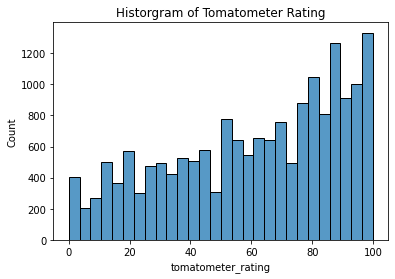

In [7]:
sns.histplot(data=film, x='tomatometer_rating').set(title='Historgram of Tomatometer Rating')

[Text(0.5, 1.0, 'Historgram of Audience Rating')]

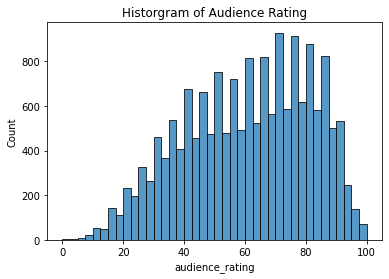

In [8]:
sns.histplot(data=film, x='audience_rating').set(title='Historgram of Audience Rating')

Both types of ratings have negative skew distribution. 

## Ratings by Month
Does the month films are released affect the rating?

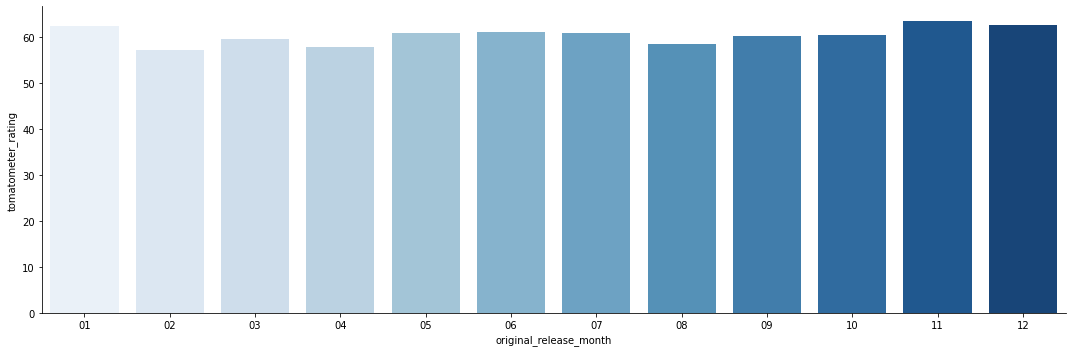

In [9]:
sns.catplot(data=film, x='original_release_month', y='tomatometer_rating', kind='bar', ci=None, aspect=3, palette='Blues', order=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])

The month that a film was released does not seem to have much of an effect on ratings. 

## Ratings by Genre

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

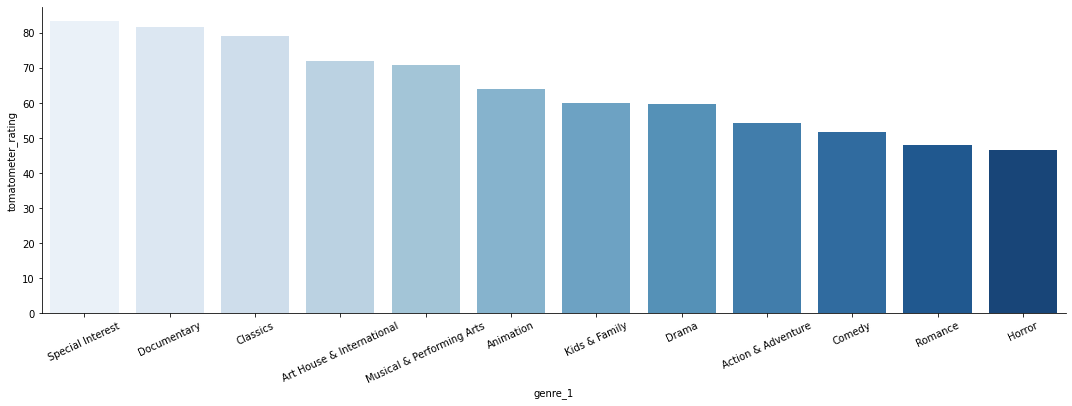

In [30]:
sns.catplot(data=film, x='genre_1', y='tomatometer_rating', kind='bar', ci=None, 
            aspect=3, palette='Blues', order=['Special Interest', 'Documentary', 'Classics', 'Art House & International', 'Musical & Performing Arts', 'Animation', 'Kids & Family', 'Drama', 'Action & Adventure', 'Comedy', 'Romance', 'Horror'])
plt.xticks(rotation=25)

## Histogram of Revenue

[Text(0.5, 1.0, 'Historgram of Gross Revenue')]

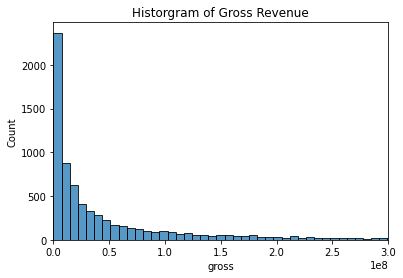

In [42]:
plt.xlim(0,300000000)
sns.histplot(data=revenue, x='gross').set(title='Historgram of Gross Revenue')

[Text(0.5, 1.0, 'Historgram of Gross Revenue')]

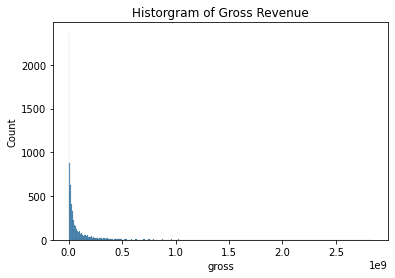

In [43]:
sns.histplot(data=revenue, x='gross').set(title='Historgram of Gross Revenue')

Revenue is very right skewed.

## Revenue by Genre

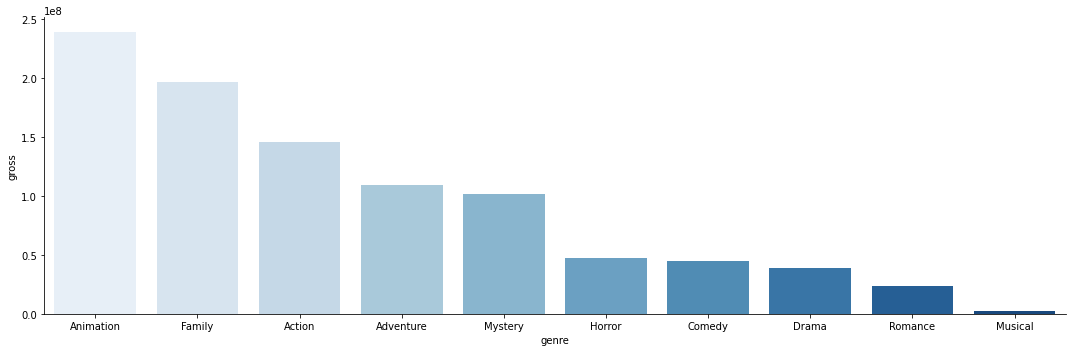

In [38]:
sns.catplot(data=revenue, x='genre', y='gross', kind='bar', ci=None, palette='Blues', aspect=3,
            order=['Animation', 'Family', 'Action', 'Adventure', 'Mystery', 'Horror', 'Comedy', 'Drama', 'Romance', 'Musical'])

## Budget and Gross Revenue Relationship

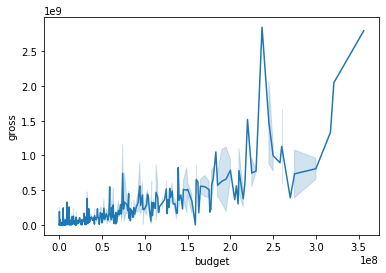

In [88]:
sns.lineplot(data=revenue, x='budget', y='gross')

This is a linear relationship, so films with a higher budget tend to have a higher gross revenue. 

## Merging Data



In [78]:
merged_data = pd.merge(film, revenue, how='left', on=["movie_title"])
merged_data.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,score,votes,director,writer,star,country,budget,gross,company,runtime_y
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,5.9,180000.0,Chris Columbus,Craig Titley,Logan Lerman,United Kingdom,95000000.0,226497209.0,Fox 2000 Pictures,118.0
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Relationship between Ratings and Budget

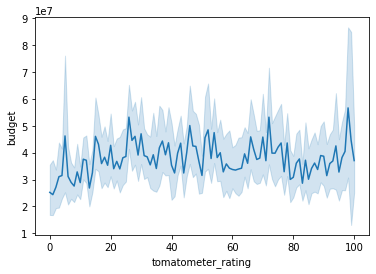

In [89]:
sns.lineplot(data=merged_data, y='budget', x='tomatometer_rating')

Budget does not seem to have a big affect on ratings. 

## Relationship between Ratings and Revenue

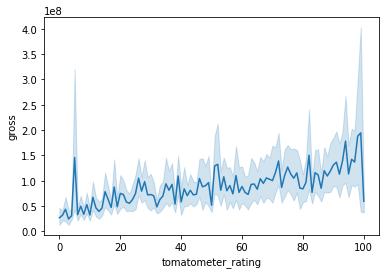

In [83]:
sns.lineplot(data=merged_data, y='gross', x='tomatometer_rating')

From the graph you can see that there is a positive trend between gross revenue and rating. They have a linear relationship. 